# NLP Recherche textuelle

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv("../Analyse textuelle/works-2024-04-02T12-22-13.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Columns: 150 entries, id to primary_location_source_type
dtypes: bool(9), float64(13), int64(8), object(120)
memory usage: 1.6+ MB


In [4]:
filtered_columns = df.filter(regex='location', axis=1)

# Supprimer les colonnes filtrées du DataFrame d'origine
df_without_filtered_columns = df.drop(columns=filtered_columns.columns)

# Afficher le DataFrame après avoir supprimé les colonnes filtrées
print(len(df_without_filtered_columns.columns))

96


In [5]:
columns=['id','display_name','publication_date','relevance_score','author_names','author_institution_names','cited_by_count','publication_year',
        'type','biblio_issue','biblio_volume','keywords_score','title','language','abstract']

In [6]:
df=df[columns]

In [7]:
df = df[df['language'] == 'fr'].reset_index(drop=True)

In [8]:
df.head()

,id,display_name,publication_date,relevance_score,author_names,author_institution_names,cited_by_count,publication_year,type,biblio_issue,biblio_volume,keywords_score,title,language,abstract
0,https://openalex.org/W2793364880,Évaluer et valoriser,2009-01-01,25.073780,François Vatin,Institutions et Dynamiques Historiques de l'Éc...,74,2009,book,NaN,NaN,0.4501,Évaluer et valoriser,fr,"Tous droits de reproduction, de traduction et ..."
1,https://openalex.org/W2042028698,L'expérience du cancer pour les familles,2006-07-01,22.933683,Nicole Delvaux,Erasmus Hospital,21,2006,article,1,n°36,0.4562|0.4378,L'expérience du cancer pour les familles,fr,Résumé L’expérience du cancer et de ses traite...
2,https://openalex.org/W2039702365,Patients’ impatience is an independent determi...,2011-12-01,22.799470,G. Réach|Alain Michault|H. Bihan|Carl B. Pauli...,Université Sorbonne Paris Nord|l'Assurance Mal...,43,2011,article,6,37,0.6379|0.5764|0.3274,Patients’ impatience is an independent determi...,fr,NaN
3,https://openalex.org/W1751156570,Les critères STOPP/START.v2 : adaptation en la...,2015-12-01,21.211727,Pierre-Olivier Lang|Moustapha Dramé|Bertrand G...,University Hospital of Lausanne|Anglia Ruskin ...,25,2015,article,90,15,0.3156|0.3087|0.2932|0.2914,Les critères STOPP/START.v2 : adaptation en la...,fr,STOPP/START est un outil de détection de la pr...
4,https://openalex.org/W1723798823,Loi de santé publique et politique de santé,2010-05-17,18.411304,Didier Tabuteau,NaN,14,2010,article,2,Vol. 22,0.9198|0.2513,Loi de santé publique et politique de santé,fr,Résumé La loi du 9 août 2004 a marqué une nouv...


# Extraction des keywords

In [9]:

# Assurez-vous de télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def extract_keywords(article_text):
    
    """
   La fonction extrait les 10 mots-clés les plus fréquemment répétés d'un article 
   en utilisant l'analyse sémantique du traitement du langage naturel (NLP)
    
    """
    
    # Tokenization des mots
    tokens = word_tokenize(article_text)

    # Récupérez les stopwords pour les deux langues
    stop_words_fr = set(stopwords.words('french'))
    stop_words_en = set(stopwords.words('english'))

    # Ajoutez des stopwords supplémentaires
    additional_stopwords = {'this', 'that', 'the', 'is', 'and', 'to', 'of', 'in','cette','ce','ces','ceux','aussi','dont','tous','tout','toute','toutes'}

    # Combinez les stopwords des deux langues avec les stopwords supplémentaires
    stop_words = stop_words_fr.union(stop_words_en).union(additional_stopwords)

    # Lemmatization des mots
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]

    # Calcul de la fréquence des mots
    fdist = FreqDist(lemmatized_tokens)
    
    # Afficher les 10 mots les plus fréquents
   # for word, frequency in fdist.most_common(10):
        #print(f"{word}: {frequency}")

    # Afficher les mots-clés (mots les plus fréquents)
    keywords = [word for word, _ in fdist.most_common(10)]
    keywords = ', '.join(keywords)
    return keywords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rachi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df["keywords"] = df["abstract"].apply(lambda x: extract_keywords(x) if isinstance(x, str) else [])


In [11]:
df.head()

,id,display_name,publication_date,relevance_score,author_names,author_institution_names,cited_by_count,publication_year,type,biblio_issue,biblio_volume,keywords_score,title,language,abstract,keywords
0,https://openalex.org/W2793364880,Évaluer et valoriser,2009-01-01,25.073780,François Vatin,Institutions et Dynamiques Historiques de l'Éc...,74,2009,book,NaN,NaN,0.4501,Évaluer et valoriser,fr,"Tous droits de reproduction, de traduction et ...","reproduction, droits, traduction, réservés, re..."
1,https://openalex.org/W2042028698,L'expérience du cancer pour les familles,2006-07-01,22.933683,Nicole Delvaux,Erasmus Hospital,21,2006,article,1,n°36,0.4562|0.4378,L'expérience du cancer pour les familles,fr,Résumé L’expérience du cancer et de ses traite...,"cancer, famille, résumé, expérience, traitemen..."
2,https://openalex.org/W2039702365,Patients’ impatience is an independent determi...,2011-12-01,22.799470,G. Réach|Alain Michault|H. Bihan|Carl B. Pauli...,Université Sorbonne Paris Nord|l'Assurance Mal...,43,2011,article,6,37,0.6379|0.5764|0.3274,Patients’ impatience is an independent determi...,fr,NaN,[]
3,https://openalex.org/W1751156570,Les critères STOPP/START.v2 : adaptation en la...,2015-12-01,21.211727,Pierre-Olivier Lang|Moustapha Dramé|Bertrand G...,University Hospital of Lausanne|Anglia Ruskin ...,25,2015,article,90,15,0.3156|0.3087|0.2932|0.2914,Les critères STOPP/START.v2 : adaptation en la...,fr,STOPP/START est un outil de détection de la pr...,"adaptation, version, critères, french, validat..."
4,https://openalex.org/W1723798823,Loi de santé publique et politique de santé,2010-05-17,18.411304,Didier Tabuteau,NaN,14,2010,article,2,Vol. 22,0.9198|0.2513,Loi de santé publique et politique de santé,fr,Résumé La loi du 9 août 2004 a marqué une nouv...,"santé, loi, politique, publique, sanitaire, ré..."


# Nuage de mots les plus fréquemment répétés

In [12]:
# Convertir les listes de la colonne 'keywords' en chaînes de caractères
df['keywords'] = df['keywords'].apply(lambda x: ''.join(x))

# Regrouper tous les éléments de la colonne 'keywords_str' en une seule ligne
keywords_regroupes = ''.join(df['keywords'])

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Charger le modèle linguistique de spaCy (en français)
nlp = spacy.load("fr_core_news_sm")

# Analyse du texte avec spaCy
doc = nlp(keywords_regroupes)

# Liste des tokens qui ne sont pas des verbes
tokens_sans_verbes = [token.text for token in doc if token.pos_ != "VERB"]




C:\Users\rachi\Downloads\Anaconda_new\envs\env_nlp\lib\site-packages\pydantic\_internal\_fields.py:160: UserWarning: Field "model_path" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
C:\Users\rachi\Downloads\Anaconda_new\envs\env_nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Convertir la liste de tokens en une chaîne de caractères
texte_sans_verbes = " ".join(tokens_sans_verbes)



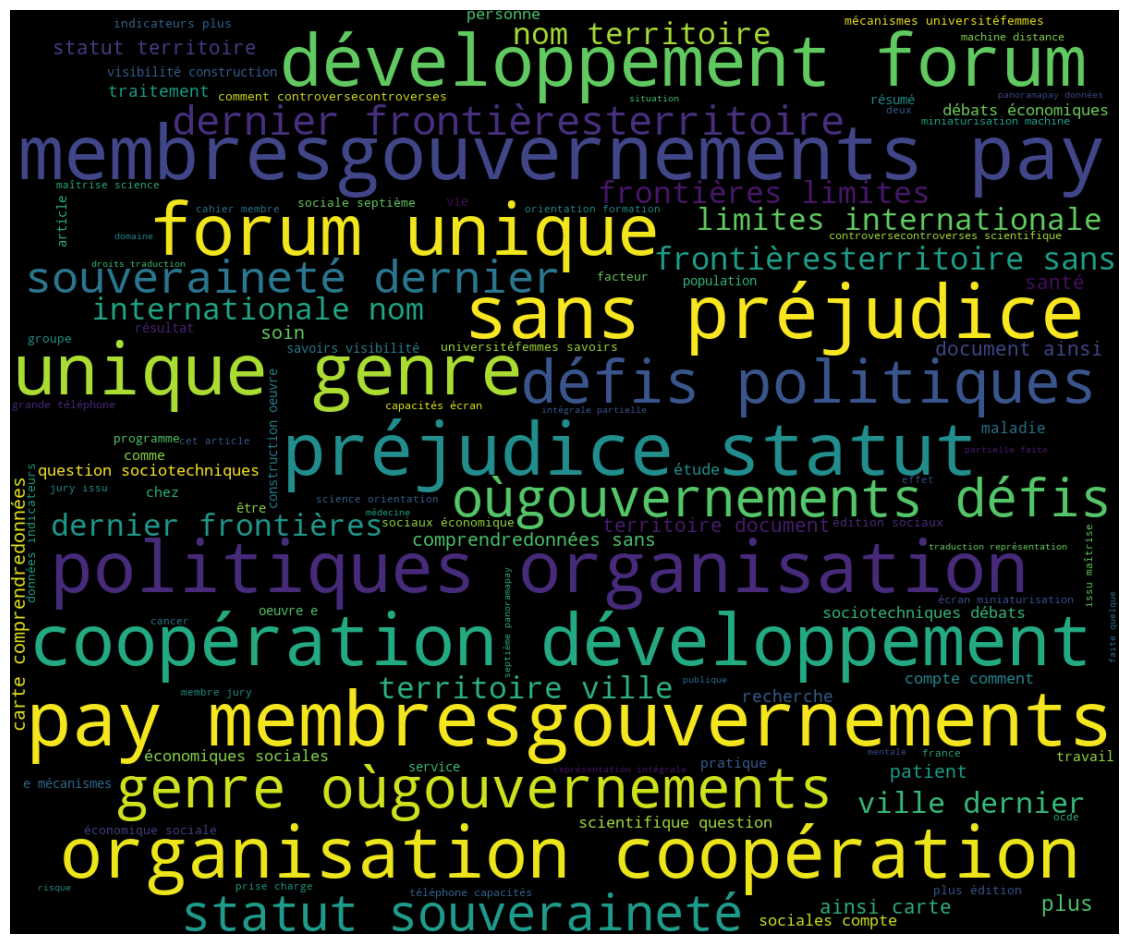

In [16]:
# Création de l'objet WordCloud avec des dimensions plus grandes
wordcloud = WordCloud(width=1200, height=1000, max_font_size=200, min_font_size=10)

# Génération du wordcloud depuis un texte
wordcloud.generate_from_text(texte_sans_verbes)

# Affichage grâce à Matplotlib
plt.figure(figsize=(15, 12))  # Définir la taille de la figure
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()